
<font size = "13"><span style="color:#EFE1D1">
(づ￣ 3￣)づ Scaling Methods with Pyspark
</span></font>

In [25]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(style="whitegrid")

In [26]:
spark = SparkSession.builder.getOrCreate()



<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ Iris Sepal Length 
</span></font>

In [27]:
spark_iris_data = spark.read.csv('Iris.csv', header=True, inferSchema=True).select('SepalLengthCm')
spark_iris_data.show()

+-------------+
|SepalLengthCm|
+-------------+
|          5.1|
|          4.9|
|          4.7|
|          4.6|
|          5.0|
|          5.4|
|          4.6|
|          5.0|
|          4.4|
|          4.9|
|          5.4|
|          4.8|
|          4.8|
|          4.3|
|          5.8|
|          5.7|
|          5.4|
|          5.1|
|          5.7|
|          5.1|
+-------------+
only showing top 20 rows



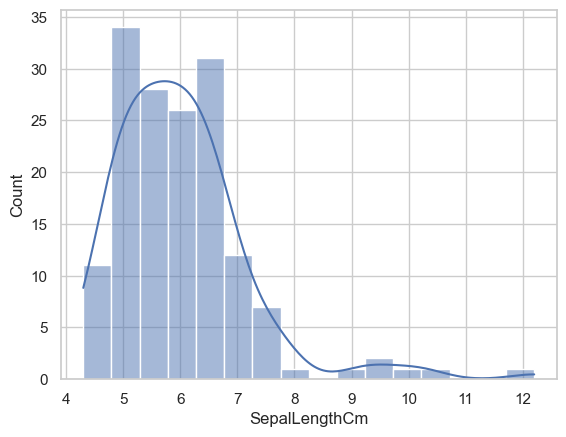

In [28]:
sns.histplot(x='SepalLengthCm', data=spark_iris_data.toPandas(), kde=True)
plt.show()


In [29]:
def reinit_data():
    spark_iris_copy = spark_iris_data.alias('spark_iris_copy')
    num_assembler = VectorAssembler()\
        .setInputCols(['SepalLengthCm'])\
        .setOutputCol('features')

    spark_iris_copy = num_assembler.transform(spark_iris_data)

    return spark_iris_copy

spark_iris_copy = reinit_data()
spark_iris_copy.show()

+-------------+--------+
|SepalLengthCm|features|
+-------------+--------+
|          5.1|   [5.1]|
|          4.9|   [4.9]|
|          4.7|   [4.7]|
|          4.6|   [4.6]|
|          5.0|   [5.0]|
|          5.4|   [5.4]|
|          4.6|   [4.6]|
|          5.0|   [5.0]|
|          4.4|   [4.4]|
|          4.9|   [4.9]|
|          5.4|   [5.4]|
|          4.8|   [4.8]|
|          4.8|   [4.8]|
|          4.3|   [4.3]|
|          5.8|   [5.8]|
|          5.7|   [5.7]|
|          5.4|   [5.4]|
|          5.1|   [5.1]|
|          5.7|   [5.7]|
|          5.1|   [5.1]|
+-------------+--------+
only showing top 20 rows




<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ StandardScaler with Mean and Standard Deviation
</span></font>

In [30]:
from pyspark.ml.feature import StandardScaler

standard_scaler_with_mean_and_std = StandardScaler(
    withStd=True, withMean=True)\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

standard_scaler = standard_scaler_with_mean_and_std.fit(spark_iris_copy)
standardized_data = standard_scaler.transform(spark_iris_copy).select('features', 'featuresScaled')
standardized_data.select('featuresScaled').show(truncate=False)

+----------------------+
|featuresScaled        |
+----------------------+
|[-0.7736861581211528] |
|[-0.9442798551768411] |
|[-1.1148735522325302] |
|[-1.200170400760375]  |
|[-0.858983006648997]  |
|[-0.517795612537619]  |
|[-1.200170400760375]  |
|[-0.858983006648997]  |
|[-1.3707640978160633] |
|[-0.9442798551768411] |
|[-0.517795612537619]  |
|[-1.029576703704686]  |
|[-1.029576703704686]  |
|[-1.456060946343908]  |
|[-0.17660821842624175]|
|[-0.2619050669540859] |
|[-0.517795612537619]  |
|[-0.7736861581211528] |
|[-0.2619050669540859] |
|[-0.7736861581211528] |
+----------------------+
only showing top 20 rows



In [31]:
def collect_data(data):
    features_list = []
    featuresScaled_list = []
    for i in range(len(data.collect())):
        features_list.append(data.collect()[i].features[0])
        featuresScaled_list.append(data.collect()[i].featuresScaled[0])
    df = pd.DataFrame({'features': features_list, 'featuresScaled': featuresScaled_list})
    return df

def visualize_data(df):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(x='features', data=df, kde=True, ax=ax[0])
    sns.histplot(x='featuresScaled', data=df, kde=True, ax=ax[1], color='orange')
    plt.show()

In [32]:
df = collect_data(standardized_data)

In [33]:
df.head()

,features,featuresScaled
0,5.1,-0.773686
1,4.9,-0.944280
2,4.7,-1.114874
3,4.6,-1.200170
4,5.0,-0.858983


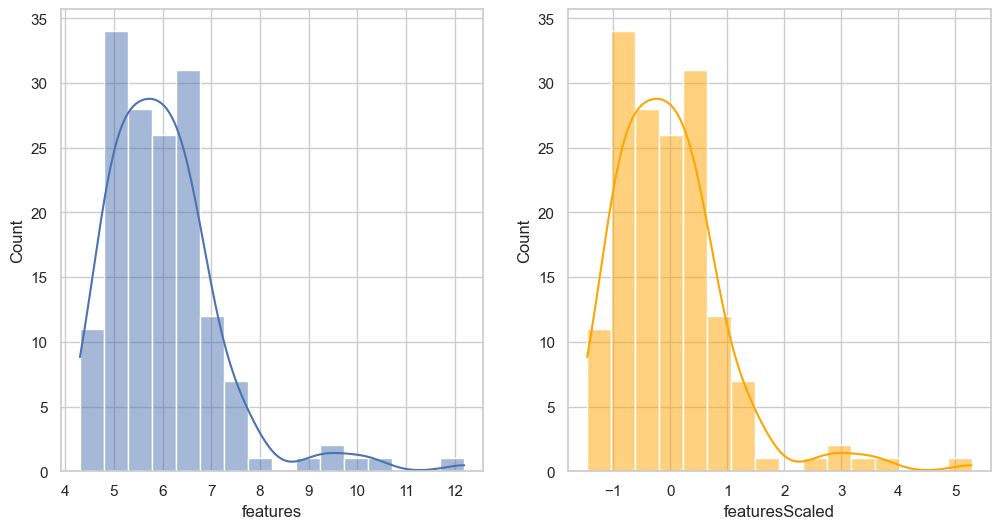

In [34]:
visualize_data(df)



<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ StandardScaler with only Standard Deviation
</span></font>

In [35]:
spark_iris_copy = reinit_data()

standard_scaler_std = StandardScaler(
    withStd=True, withMean=False)\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

standard_scaler = standard_scaler_std.fit(spark_iris_copy)
standardized_data = standard_scaler.transform(spark_iris_copy)
standardized_data.select('featuresScaled').show(truncate=False)

+--------------------+
|featuresScaled      |
+--------------------+
|[4.350139274920066] |
|[4.179545577864377] |
|[4.008951880808688] |
|[3.9236550322808434]|
|[4.264842426392221] |
|[4.6060298205036]   |
|[3.9236550322808434]|
|[4.264842426392221] |
|[3.753061335225155] |
|[4.179545577864377] |
|[4.6060298205036]   |
|[4.094248729336532] |
|[4.094248729336532] |
|[3.66776448669731]  |
|[4.947217214614977] |
|[4.861920366087133] |
|[4.6060298205036]   |
|[4.350139274920066] |
|[4.861920366087133] |
|[4.350139274920066] |
+--------------------+
only showing top 20 rows



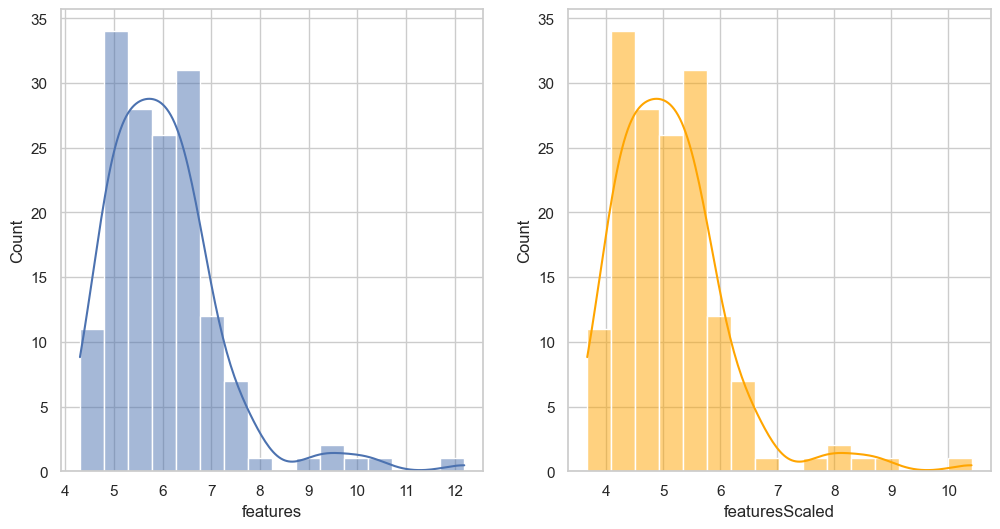

In [36]:
visualize_data(collect_data(standardized_data))


<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ MinMaxScaler
</span></font>

In [37]:
from pyspark.ml.feature import MinMaxScaler

spark_iris_copy = reinit_data()

min_max_scaler = MinMaxScaler()\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

min_max_scaler_method = min_max_scaler.fit(spark_iris_copy)
min_max_scaler_data = min_max_scaler_method.transform(spark_iris_copy)
min_max_scaler_data.select('featuresScaled').show(truncate=False)

+----------------------+
|featuresScaled        |
+----------------------+
|[0.10126582278481011] |
|[0.07594936708860767] |
|[0.05063291139240511] |
|[0.03797468354430378] |
|[0.08860759493670889] |
|[0.139240506329114]   |
|[0.03797468354430378] |
|[0.08860759493670889] |
|[0.012658227848101333]|
|[0.07594936708860767] |
|[0.139240506329114]   |
|[0.06329113924050633] |
|[0.06329113924050633] |
|[0.0]                 |
|[0.189873417721519]   |
|[0.17721518987341778] |
|[0.139240506329114]   |
|[0.10126582278481011] |
|[0.17721518987341778] |
|[0.10126582278481011] |
+----------------------+
only showing top 20 rows



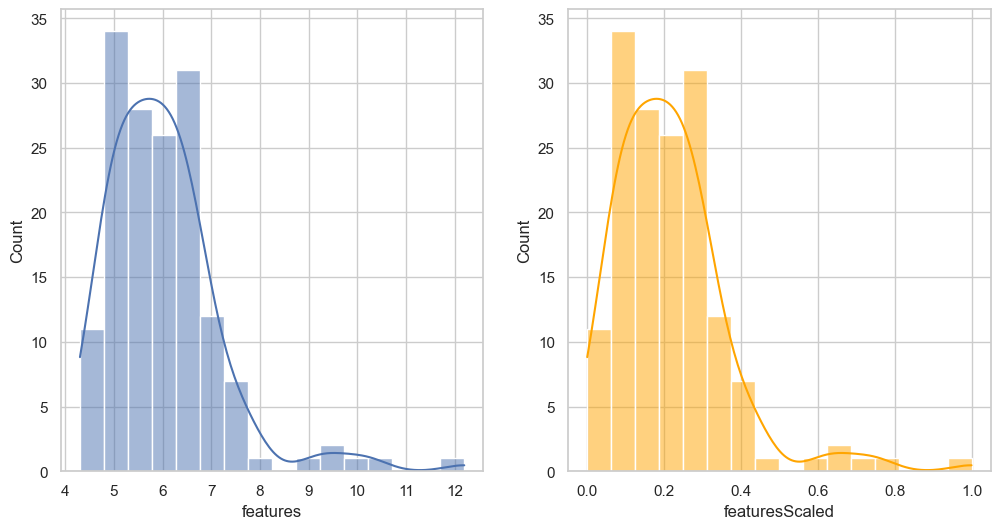

In [38]:
visualize_data(collect_data(min_max_scaler_data))


<font size = "13"><span style="color:#EFE1D1">
( ﾉ ﾟｰﾟ)ﾉ RobustScaler
</span></font>

In [39]:
from pyspark.ml.feature import RobustScaler

spark_iris_copy = reinit_data()

robust_scaler = RobustScaler()\
    .setInputCol('features')\
    .setOutputCol('featuresScaled')

robust_scaler_method = robust_scaler.fit(spark_iris_copy)
robust_scaler_data = robust_scaler_method.transform(spark_iris_copy)
robust_scaler_data.select('featuresScaled').show(truncate=False)

+--------------------+
|featuresScaled      |
+--------------------+
|[3.6428571428571415]|
|[3.499999999999999] |
|[3.3571428571428563]|
|[3.2857142857142847]|
|[3.5714285714285703]|
|[3.8571428571428563]|
|[3.2857142857142847]|
|[3.5714285714285703]|
|[3.1428571428571423]|
|[3.499999999999999] |
|[3.8571428571428563]|
|[3.4285714285714275]|
|[3.4285714285714275]|
|[3.0714285714285703]|
|[4.1428571428571415]|
|[4.07142857142857]  |
|[3.8571428571428563]|
|[3.6428571428571415]|
|[4.07142857142857]  |
|[3.6428571428571415]|
+--------------------+
only showing top 20 rows



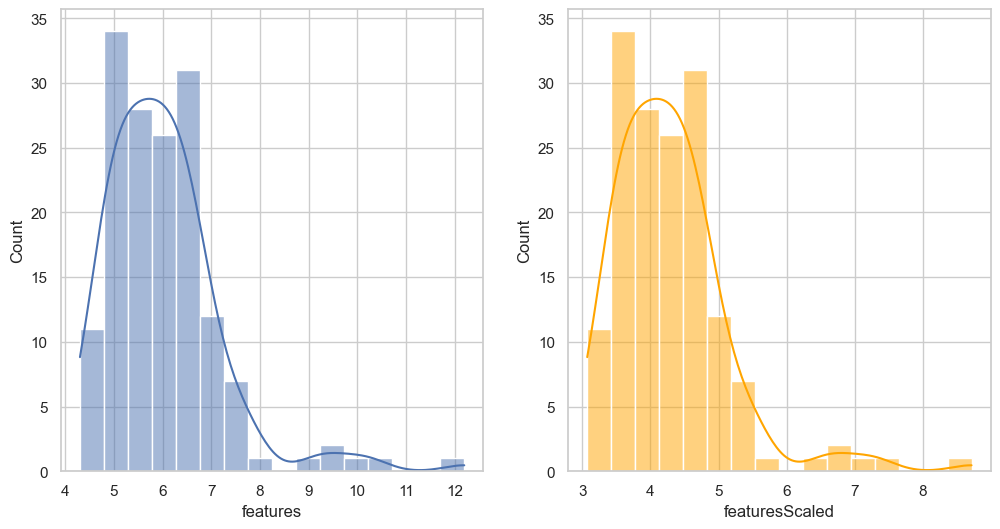

In [40]:
visualize_data(collect_data(robust_scaler_data))
